In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.shape

(891, 15)

In [6]:
df.dropna().shape

(182, 15)

In [7]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


<Axes: xlabel='age', ylabel='Count'>

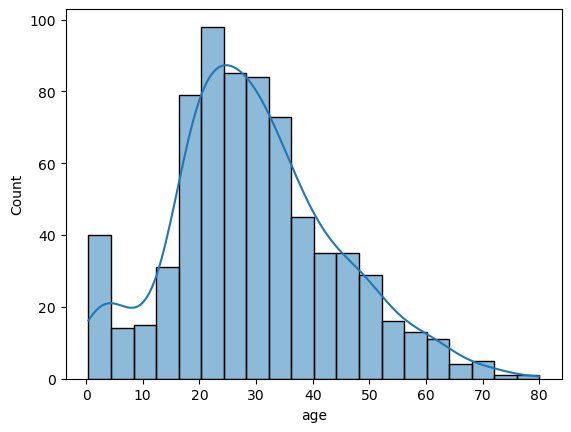

In [8]:
sns.histplot(df['age'],kde=True)

<Axes: xlabel='age', ylabel='Count'>

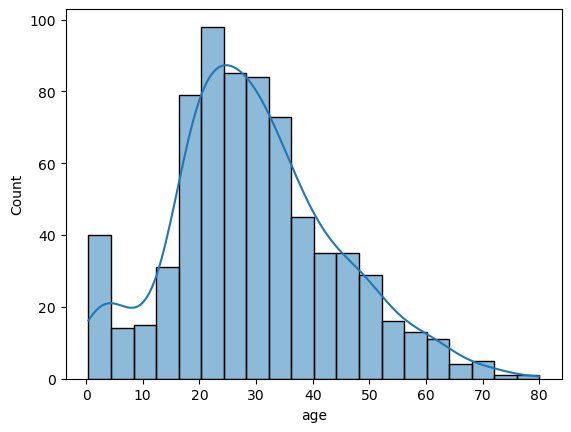

In [9]:
sns.histplot(df['age'],kde=True)

In [10]:
df['Age_mean'] =df['age'].fillna(df['age'].mean)

In [11]:
df[['Age_mean','age']]

,Age_mean,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,<bound method NDFrame._add_numeric_operations....,NaN
889,26.0,26.0


TypeError: Invalid object type at position 5

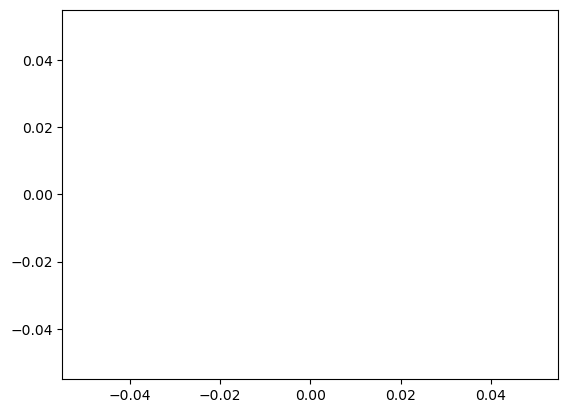

In [12]:
sns.histplot(df['Age_mean'],kde=True)

In [15]:
df['age_median'] = df['age'].fillna(df['age'].median())

# Handling Imbalance dataset

In [16]:
np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0  =int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [17]:
n_class_0,n_class_1

(900, 100)

In [19]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [20]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [21]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [22]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [23]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [27]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,replace = True,
                               n_samples=len(df_majority),
                               random_state=42)

In [28]:
df_minority_upsampled.shape

(900, 3)

In [30]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [31]:
df_upsampled['target'].value_counts()

NameError: name 'df_upsampled' is not defined

In [32]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

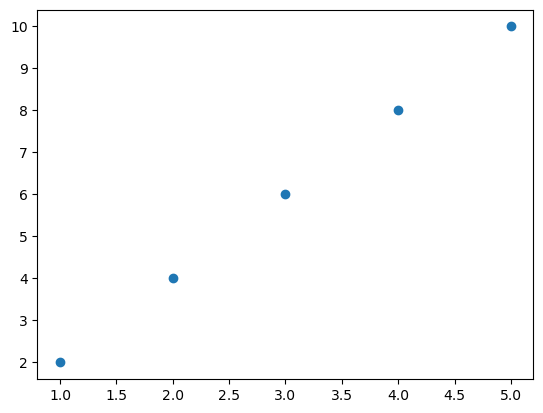

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [35]:
x_new = np.linspace(1,5,10)
y_interp = np.interp(x_new,x,y)

In [36]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

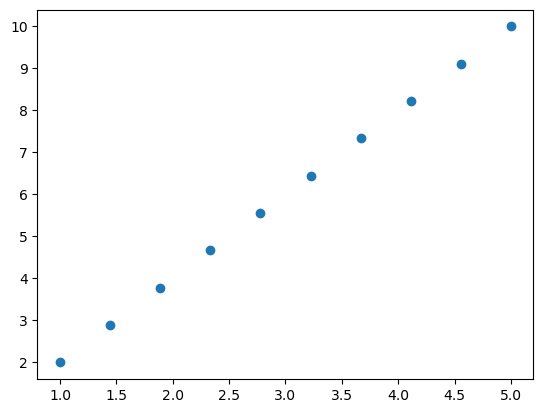

In [37]:
plt.scatter(x_new,y_interp)

In [38]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

In [46]:
from scipy.interpolate import interp1d

In [47]:
f = interp1d(x,y,kind='cubic')

In [48]:
x_new = np.linspace(1,5,10)
y_interp=f(x_new)

In [49]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

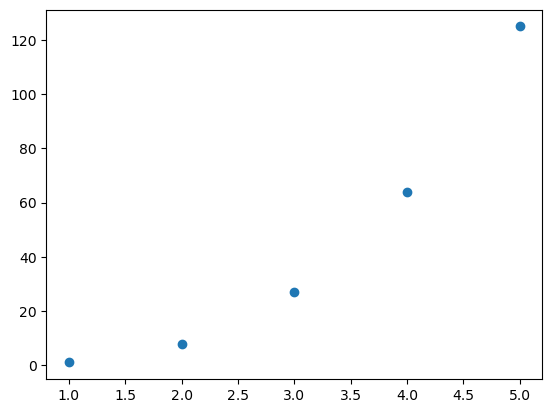

In [52]:
plt.scatter(x,y)

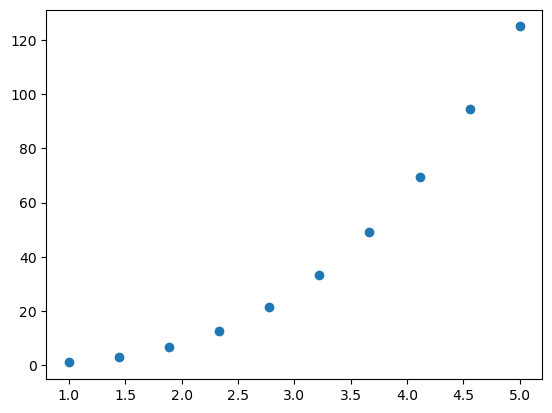

In [53]:
plt.scatter(x_new,y_interp)

# Polynomial Interpolation

In [55]:
import numpy as np 

In [56]:
x= np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])

In [57]:
p = np.polyfit(x,y,2)

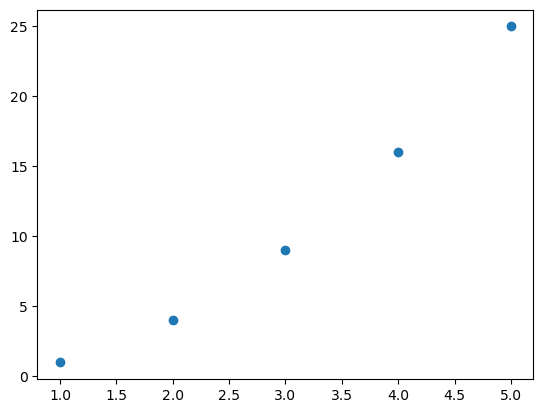

In [58]:
plt.scatter(x,y)

In [59]:
x_new = np.linspace(1,5,10)
y_interp =np.polyval(p,x_new)

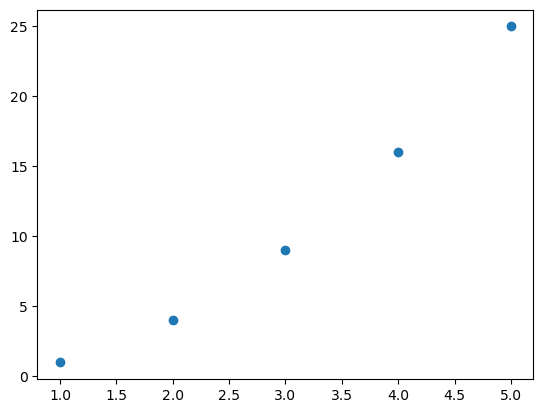

In [60]:
plt.scatter(x,y)

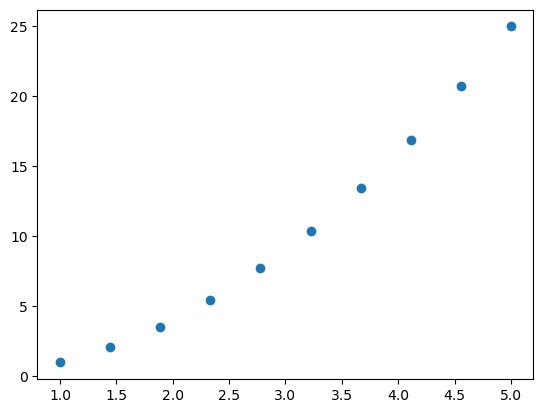

In [61]:
plt.scatter(x_new,y_interp)